# Introduction to Significance Testing and AB Testing

This notebook provides a beginner-friendly introduction to significance testing and AB testing, designed for readers who may not have prior experience with these statistical concepts. We will explore these topics through a practical scenario involving website conversion rates. 

**Key Concepts Covered:**

- **Population vs. Sample**: We'll explain the importance of taking samples from a population and explore the concept of sampling variability.

- **AB Testing**: Introduction to AB testing, a method used to compare different versions of a webpage (e.g., with varying button colors) to assess their effectiveness in converting users.

- **Null Hypothesis**: Understanding the role of the null hypothesis in significance testing, which assumes no difference between groups being compared.

- **P-Value**: Delving into significance levels, and how p-values quantify the likelihood of obtaining a test result as extreme as the observed result under the null hypothesis.

- **Sample Size**: Demonstrating how increasing sample sizes can narrow the range of possible outcomes and enhance our ability to detect significant differences in AB testing.

By the end of this notebook, you'll have a clearer understanding of these fundamental statistical concepts and their practical application in decision-making, particularly in the context of AB testing. We will emphasize interpreting results within the context of p-values and the null hypothesis, enabling you to make informed decisions based on data.

Let's begin our journey into the world of significance testing and AB testing!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import random
from statsmodels.stats.proportion import proportions_ztest
random.seed(1)

## Sampling

**Scenario**

You manage a website for an e-commerce company and want to measure the conversion rate of a specific product page (% of users landing on the page that make a purchase). 

Rather than measuring the conversion rate for the entire population of users visiting the page, you want to measure it for a sample of 1,000 users, will this give us a good approximation of the overall conversion rate?

To test this we will generate a simulation of 100,000 users visiting the page (our population) with a set conversion rate of 12.5%, we will then take samples from the population and see how well the sample conversion rates accurately represent the conversion rate of the overall population.

In [2]:
## Generating our Population
conversion_rate = 0.125
pop_size = 100000
population = [1 if i < pop_size*conversion_rate else 0 for i in range(pop_size)]

In [3]:
print(f"audence size: {len(population):,}")
print(f"Open Rate: {np.mean(population):.1%}")
print(f"From {len(population):,} visiters to our product page, \
{np.mean(population):.1%} converted to making a purchase.")

audence size: 100,000
Open Rate: 12.5%
From 100,000 visiters to our product page, 12.5% converted to making a purchase.


we can see that for our simulated population, the conversion rate is 12.5%, now let's take some sample audiences, to mimic our attempt to estimate the conversion rate.

In [4]:
sample_1 = random.sample(population,1000)
sample_2 = random.sample(population,1000)
sample_3 = random.sample(population,1000)

In [5]:
print(f"For sample 1, of {len(sample_1):,} users visiting the product page, \
we see a conversion rate of {np.mean(sample_1):.1%}")

print(f"For sample 2, of {len(sample_2):,} users visiting the product page, \
we see a conversion rate of {np.mean(sample_2):.1%}")


print(f"For sample 3, of {len(sample_3):,} users visiting the product page, \
we see a conversion rate of {np.mean(sample_3):.1%}")


For sample 1, of 1,000 users visiting the product page, we see a conversion rate of 11.9%
For sample 2, of 1,000 users visiting the product page, we see a conversion rate of 11.7%
For sample 3, of 1,000 users visiting the product page, we see a conversion rate of 12.9%


Whilst we know the true conversion rate of our population is 12.5%, each of our samples shows a slightly different conversion rate, some lower (11.7%) and some higher (12.9%) than our true conversion rate.

If we repeat this exercise many times over, we see that the conversion rate will fall across a range of rates, centered around the true value of 12.5%.

In [7]:
## taking 10,000 samples
samples = [np.mean(random.sample(population,1000)) for i in range(10000)]

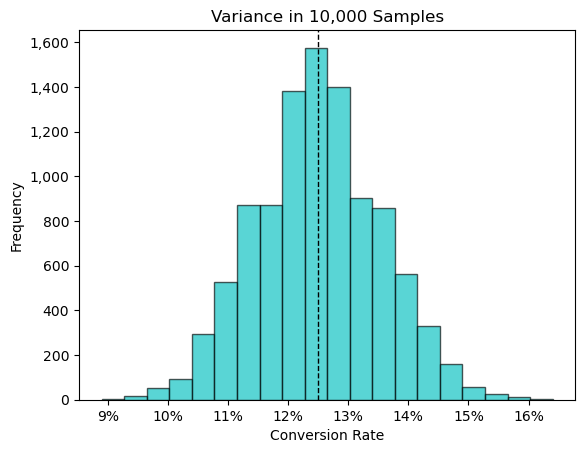

In [8]:
fig, ax = plt.subplots()

plt.hist(samples, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(np.mean(samples), color='k', linestyle='dashed', linewidth=1)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel('Conversion Rate')
ax.set_ylabel('Frequency')
_=ax.set_title('Variance in 10,000 Samples')

Whilst the overall population conversion rate is 12.5%, any sample of 1,000 users can have a conversion rate anywhere from 9% to 16%. 

This is due to sampling variability. When we take a sample from a population, due to the random nature of the sampling process, we are likely to get a sample that is close to but not **perfectly** representative of the entire population. This leads to variability in the conversion rate for any given sample.

So for any 1,000 user sample, the conversion rate we observe will be close to the true population conversion rate, but may not be the exact conversion rate.

## AB Testing

Now let's suppose that we want to test a variant of the page that has a red "buy now" button, instead of the current colour (blue).

To test this, we run each version of the page side by side, and randomly assign each customer to either the control page (blue button) or our test page (red button).

We run this test until we have 1,000 users in our control pot, and 1,000 users in our variant pot.

**The conversion rate of the control group is 12.3%** - this is close to our true conversion rate of 12.5%, and well within the range we observed earlier from our sample distribution (9% to 16%).

**The conversion rate of the test group is 14.0%** - this is higher than our control group conversion rate, so on the surface of things we may conclude that the red button does a better job of converting people to make a purchase, and so we should permanently change the button colour to red.

again though, **this conversion rate of 14.0% is well within the range of conversion rates we observed earlier from our sample distribution; there is a chance that the increased conversion rate is down to sampling variability, not an improved performance. How do we decide if this is a genuine improvement, or just random sampling variability?**

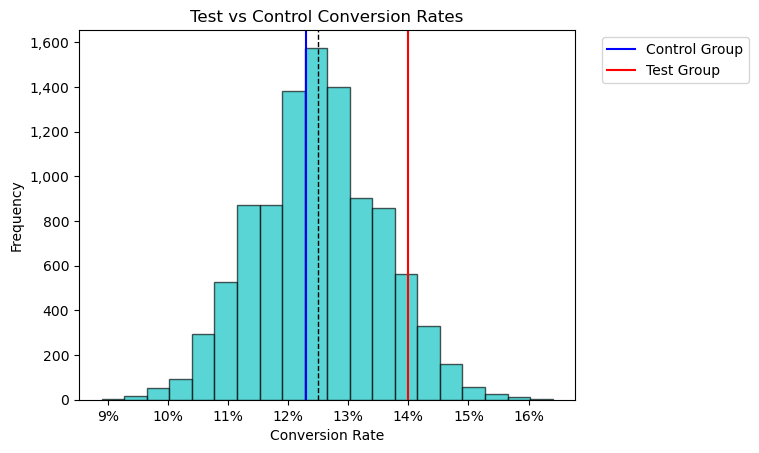

In [9]:
fig, ax = plt.subplots()

plt.hist(samples, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(np.mean(samples), color='k', linestyle='dashed', linewidth=1)
plt.axvline(0.123, color='blue', linestyle='solid', label = 'Control Group')
plt.axvline(0.14, color='red', linestyle='solid', label = 'Test Group')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel('Conversion Rate')
ax.set_ylabel('Frequency')
_=ax.set_title('Test vs Control Conversion Rates')

_<center> Both conversion rates are well within the distribution of conversion rates we saw from our sampling exercise. Is the performance of the red vs blue button truly different, or is this just sampling variability? </center>_

The answer is that we use a measure of significance to determine whether we attribute the observed difference to the change we are testing, or to random variability. 

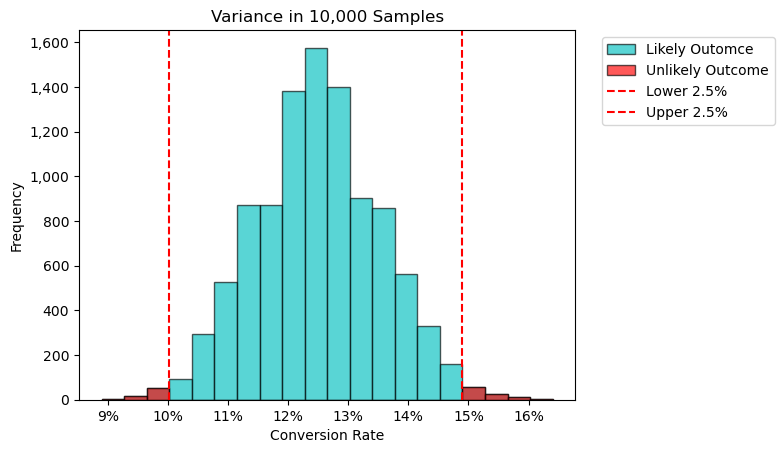

In [10]:
upper = 0.149 ## these represent the upper and lower 2.5% of the histogram
lower = 0.1002
extremes = [i for i in samples if i >upper or i<lower]

fig, ax = plt.subplots()
plt.hist(samples, bins=20, color='c', edgecolor='k', alpha=0.65, label = 'Likely Outomce')
plt.hist(extremes, bins=20, color='red', edgecolor='k', alpha=0.65, label = 'Unlikely Outcome')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.axvline(lower, color='r', linestyle='--', label='Lower 2.5%')
plt.axvline(upper, color='r', linestyle='--', label='Upper 2.5%')

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

ax.set_xlabel('Conversion Rate')
ax.set_ylabel('Frequency')
_=ax.set_title('Variance in 10,000 Samples')

The above histogram can be interpreted as the probability of a sample, taken randomly from our population, having a particular conversion rate.

It is **likely** that the open rate of any given sample will be close to the true value of 12.5%, but there is a small chance that the open rate will fall into the extreme tails of the distribution (e.g. below 10% or above 15%). 

In AB testing, if there is no difference in the impact of our test treatment (e.g. the red button) then it is **likely** that the conversion rate of our test group will fall within the blue shaded area of the chart. In such cases, we can reasonably conclude that there is no significant difference in performance between the test and control treatments.

Conversely, if the conversion rate of the test group falls into the extreme wings of the distribution (the red-shaded area), we can conclude that this result is **highly unlikely** given the performance of the red and the blue buttons are equal. In such cases, we would conclude that there is a significant difference in performance of the red vs the blue button.

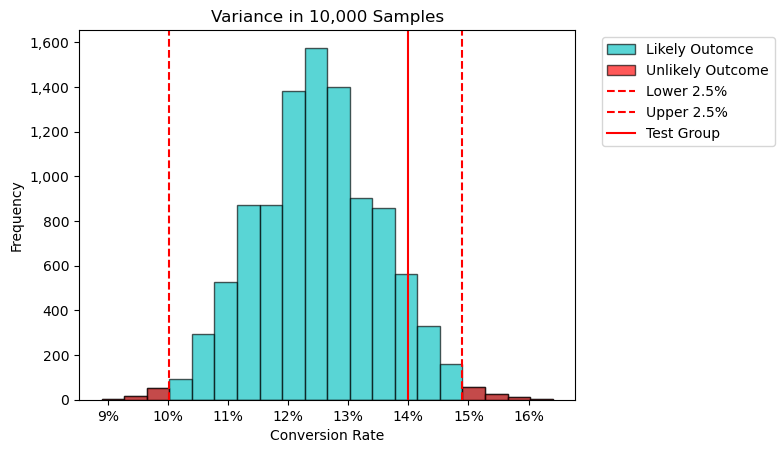

In [11]:
upper = 0.149 ## these represent the upper and lower 2.5% of the histogram
lower = 0.1002
extremes = [i for i in samples if i >upper or i<lower]

fig, ax = plt.subplots()
plt.hist(samples, bins=20, color='c', edgecolor='k', alpha=0.65, label = 'Likely Outomce')
plt.hist(extremes, bins=20, color='red', edgecolor='k', alpha=0.65, label = 'Unlikely Outcome')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.axvline(lower, color='r', linestyle='--', label='Lower 2.5%')
plt.axvline(upper, color='r', linestyle='--', label='Upper 2.5%')
plt.axvline(0.14, color='red', linestyle='solid', label = 'Test Group')

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

ax.set_xlabel('Conversion Rate')
ax.set_ylabel('Frequency')
_=ax.set_title('Variance in 10,000 Samples')

Returning to our test scenario, our test group saw a conversion rate of 14.0%. Plotting this on the sample distribution we see this outcome is probably, given the assumption that the red and blue buttons perform equally. In this case we conclude no significant difference in performance between our test and control treatments.

To apply formalised language to this we say that we are testing against a Null Hypothesis, in this case we are testing against the null hypothesis that _there is no difference in conversion rate for users exposed to the blue button, vs the red button_.

To quantify the probability of seeing our result, given the null hypothesis is true, we calculate a p-value. In the above scenario, the p-value is 0.26. This indicates that, assuming the null hypothesis to be true, there is a 26% chance of obtaining a test result (conversion rate) as extreme as, or more extreme than, the observed result of 14.0% by random chance alone.

As we have observed that there is more than 5% chance of observing the test conversion rate under the assumption of the null hypothesis, we **do not reject the null hypothesis**, and so conclude that _there is no difference in conversion rate for users exposed to the blue button, vs the red button_.

**Note**: 5% is a typical cut off used to determine significance, but we can be more strict (e.g. 1% as our cutoff) or more lenient (e.g. using 10% as our cutoff) depending on the situation. This is mostly determined by the impact that making a false positive error - concluding a difference where there is none - would have. In medical trials for example, there could be huge risk involved with incorrectly concluding a positive result, in which case we would use a very low significance level to mitigate this risk.

## Sample Sizes

One way we can increase our ability to detect significant differences is by increasing our sample sizes. The plots below show how the variability in possible conversion rates reduces, as the size of our samples increases.

In [15]:
samples_2k = [np.mean(random.sample(population,2000)) for i in range(10000)]
samples_5k = [np.mean(random.sample(population,5000)) for i in range(10000)]

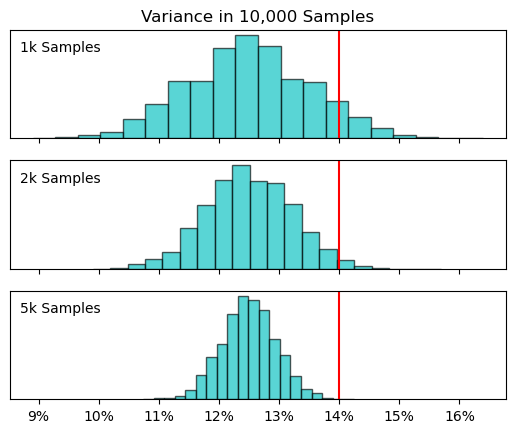

In [16]:
fig, ax = plt.subplots(3, 1, sharex=True)

ax[0].hist(samples, bins=20, color='c', edgecolor='k', alpha=0.65)
ax[0].text(0.02,0.8,"1k Samples",transform=ax[0].transAxes)
ax[1].hist(samples_2k, bins=20, color='c', edgecolor='k', alpha=0.65)
ax[1].text(0.02,0.8,"2k Samples",transform=ax[1].transAxes)
ax[2].hist(samples_5k, bins=20, color='c', edgecolor='k', alpha=0.65)
ax[2].text(0.02,0.8,"5k Samples",transform=ax[2].transAxes)

for i in range(3):
    ax[i].axvline(0.14, color='red', linestyle='solid', label = 'Test Group')
    ax[i].axes.get_yaxis().set_visible(False)

ax[0].set_title('Variance in 10,000 Samples')
ax[2].xaxis.set_major_formatter(mtick.PercentFormatter(1,decimals=0))

We see that as our sample sizes increase from 1,000 through to 5,000, the possible spread of expected conversion rates narrows, from a range of 9% to 15%, to a range of ~11% to 14%. As the possible spread of results narrows, our test result of 14.0% becomes more and more extreme, and in accordance with that our p-value gets smaller and smaller, to the point where having a sample size of 5k gives us a p- value small enough (below the 0.05 threshold) that we are able to reject the null hypothesis.

p-value at 1k sample size - 0.26 | **Do not reject the null hypothesis**<br>
p-value at 2k sample size - 0.11 | **Do not reject the null hypothesis**<br>
p-value at 5k sample size - 0.01 | **Reject the null hypothesis**

In short, increased sample sizes improve our ability to detect significant differences when conducting AB tests!

## Summary: Key Definitions and Takeaways

As we conclude our exploration of significance testing and AB testing, let's recap the essential definitions and takeaways:

1. **Population**: The entire user group of interest, often too large or impractical to analyse comprehensively (e.g. we instances where we cannot expose an entire population to a test).

2. **Sample**: A subset of the population that is selected for analysis or testing. Samples are used to make inferences about the entire population.

6. **Sampling Variability**: The natural variation in sample statistics due to random sampling. It can lead to different results in different samples.

3. **Null Hypothesis**: A statement that there is no significant difference or effect between treatments/groups. It serves as a baseline for statistical testing.

4. **P-Value**: A probability value that quantifies the likelihood of obtaining a test result as extreme as the observed result under the null hypothesis. Smaller p-values suggest stronger evidence against the null hypothesis.

5. **Significance Level**: The threshold value set to determine statistical significance. Commonly used levels include 0.05 (5%) and 0.01 (1%).

6. **Sample Size**: The number of users exposed to your test/control treatment. Increasing sample sizes can reduce sampling variability and improve the accuracy of statistical tests.

By mastering these concepts and applying them in practical scenarios, you'll be equipped to make data-driven decisions and draw meaningful insights from your experiments. Significance testing and AB testing are valuable tools for uncovering patterns, trends, and differences in data, contributing to informed decision-making in various fields.